
# All Imports Here





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from tabulate import tabulate
import seaborn as sn

 **Question 1:** Download the Fashion_MNIST (https://www.kaggle.com/datasets/zalandoresearch/fashionmnist) dataset. Split the dataset into training, validation and testing sets. A common split is 80% of the data to train, 10% to validate, and 10% to test scenarios, but you can adjust this as needed. Normalize the images. This involves scaling the pixel values to a range between 0 and 1.



**Question 2:** Implement a MLP for classification. (total 40 marks)

**Question 2(a):** Flatten the images into a single dimensional vector before feeding it to the model. (1 marks)

In [ ]:
# Data Loading and Preprocessing from Kaggle CSV with Validation Split

def load_fashion_mnist_kaggle(path_train, path_test, validation_split=0.2):

    df_train = pd.read_csv(path_train)
    df_test = pd.read_csv(path_test)

    train_labels_full = df_train['label'].values
    test_labels = df_test['label'].values

    train_pixels_full = df_train.iloc[:, 1:].values.astype(np.float32)
    test_pixels = df_test.iloc[:, 1:].values.astype(np.float32)

# Normalizing pixel values to range [0, 1]

    train_data_full = (train_pixels_full / 255.0)
    test_data = (test_pixels / 255.0)

# Spliting training data into training and validation sets

    num_train_full = train_data_full.shape[0]
    num_validation = int(validation_split * num_train_full)
    num_train = num_train_full - num_validation

    train_data = train_data_full[:num_train]
    train_labels = train_labels_full[:num_train]
    validation_data = train_data_full[num_train:]
    validation_labels = train_labels_full[num_train:]

    return train_data, train_labels, validation_data, validation_labels, test_data, test_labels

# Loading data with validation split of 0.15
# path_train='/content/drive/MyDrive/CS776/data/fashion-mnist_train.csv', path_test='/content/drive/MyDrive/CS776/data/fashion-mnist_test.csv'
train_data, train_labels, validation_data, validation_labels, test_data, test_labels = load_fashion_mnist_kaggle(
    path_train='./content/data/fashion-mnist_train.csv', path_test='./content/data/fashion-mnist_test.csv', validation_split=0.15
)


**Question 2(b):** Write a pre-processing module for all the images. (3 marks)

train data shape: (51000, 784)
validation data shape: (9000, 784)
test data shape: (10000, 784)


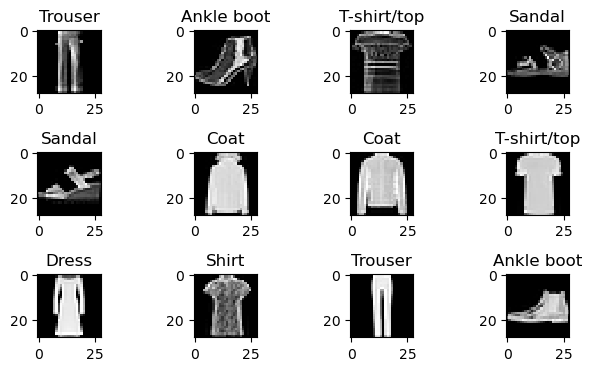

In [ ]:
# Check the dimension of images
print("train data shape:", train_data.shape)
print("validation data shape:", validation_data.shape)
print("test data shape:", test_data.shape)

#visualize the dataset

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

train_check=train_data.shape[0]
validation_check=validation_data.shape[0]
test_check=test_data.shape[0]

np.random.seed(0);
indices = list(np.random.randint(train_check,size=12))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(train_data[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("{}".format(class_names[train_labels[indices[i]]]))
    plt.tight_layout()

def rgb_to_grayscale(images):
    return np.dot(images[..., :3], [0.2989, 0.5870, 0.1140])

In [ ]:
def rotate_flattened_image(image, angle_percent):
    #the angle is within the +-10% range
    angle_percent = np.clip(angle_percent, -10, 10)
    img_2d = image.reshape(28, 28)
    angle_rad = (angle_percent / 100) * (np.pi / 2)
    cos_theta = np.cos(angle_rad)
    sin_theta = np.sin(angle_rad)
    rotation_matrix = np.array([
        [cos_theta, -sin_theta],
        [sin_theta, cos_theta]
    ])
    center = np.array([13.5, 13.5])
    x, y = np.meshgrid(np.arange(28), np.arange(28))
    coords = np.stack([x.flatten(), y.flatten()]) - center[:, np.newaxis]

    # Apply rotation
    rotated_coords = np.dot(rotation_matrix, coords) + center[:, np.newaxis]
    x_rotated, y_rotated = rotated_coords
    x_floor, y_floor = np.floor(rotated_coords).astype(int)
    x_ceil, y_ceil = np.ceil(rotated_coords).astype(int)

    x_floor = np.clip(x_floor, 0, 27)
    x_ceil = np.clip(x_ceil, 0, 27)
    y_floor = np.clip(y_floor, 0, 27)
    y_ceil = np.clip(y_ceil, 0, 27)

    wx = x_rotated - x_floor
    wy = y_rotated - y_floor

    rotated_img = (
        (1 - wx) * (1 - wy) * img_2d[y_floor, x_floor] +
        wx * (1 - wy) * img_2d[y_floor, x_ceil] +
        (1 - wx) * wy * img_2d[y_ceil, x_floor] +
        wx * wy * img_2d[y_ceil, x_ceil]
    )

    return rotated_img.flatten()

augmented_images = []
augmented_labels = []

for image, label in zip(train_data, train_labels):
    augmented_images.append(image)  # Original image
    augmented_labels.append(label)

    # Add rotated versions
    for angle in [-10, -5, 5, 10]:
        rotated = rotate_flattened_image(image, angle)
        augmented_images.append(rotated)
        augmented_labels.append(label)

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

print("Augmented data shape:", augmented_images.shape)

train_data=augmented_images
train_labels=augmented_labels

print("train data shape:", train_data.shape)


def rgb_to_grayscale(images):
    return np.dot(images[..., :3], [0.2989, 0.5870, 0.1140])

size=28
channels=1
def prepare_data(X, size, channels):
    X = X.reshape(X.shape[0], size, size, channels)
    X = X.astype("float32")
    return X/255.


**Question 2(c):** Write the Forward pass from scratch. Use of the inbuilt forward pass function will result in 0 marks for this sub-question. (8 marks)

**Question 2(d):** Write the Backward pass from scratch. Use of the inbuilt back propagation function will result in 0 marks for this sub-question (12 marks)


**We have written Forward Pass and Backward Pass in the class together so we cant separate it**

For this, we wrote two classes, LinearLayer and MLP for Single Layer and Multiple Layer so it can be used multiple number of times


In [ ]:
# Linear Layer containing Forward Pass function, Backward Pass function and Updating the parameters i.e. Weight and Bias

class LinearLayer:
    def __init__(self, input_size, output_size):
        self.W = np.random.randn(input_size, output_size) * np.sqrt(2.0 / input_size) # He initialization
        self.b = np.zeros((1, output_size))
        self.dW = None
        self.db = None
        self.input = None

    #Forward Pass

    def forward(self, input_data):
        self.input = input_data
        return np.dot(input_data, self.W) + self.b

    #Backward Pass

    def backward(self, output_gradient):
        self.dW = np.dot(self.input.T, output_gradient)
        self.db = np.sum(output_gradient, axis=0, keepdims=True)
        return np.dot(output_gradient, self.W.T)

    #Updating Parameters

    def update_params(self, learning_rate):
        if self.dW is not None:
            # Clips gradients to range [-clip_value, clip_value]
            clip_value = 100.0
            self.dW = np.clip(self.dW, -clip_value, clip_value)
            self.db = np.clip(self.db, -clip_value, clip_value)
            self.W -= learning_rate * self.dW
            self.b -= learning_rate * self.db



In [ ]:
# Defining all the activation functions and their derivatives (ReLU, Leaky-ReLU, Tanh, GELU)


# ReLU class having activation function and it's derivative
class ReLU:

    def forward(self, x):
        self.input = x
        return np.maximum(0, x)

    def backward(self, output_gradient):
        return output_gradient * (self.input > 0).astype(float)

# Leaky-ReLU class having activation function and it's derivative
class LeakyReLU:

    def __init__(self, alpha=0.01):
        self.alpha = alpha
        self.input = None

    def forward(self, x):
        self.input = x
        return np.where(x > 0, x, self.alpha * x)

    def backward(self, output_gradient):
        return output_gradient * np.where(self.input > 0, 1, self.alpha)

# Tanh class having activation function and it's derivative
class Tanh:

    def forward(self, x):
        self.output = np.tanh(x)
        return self.output

    def backward(self, output_gradient):
        return output_gradient * (1 - self.output**2)

# GELU class having activation function and it's derivative

class GELU:

    def forward(self, x):
        self.input = x
        cdf = 0.5 * (1.0 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))
        return x * cdf

    def backward(self, output_gradient):
        x = self.input
        tanh_val = np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3))
        sech_squared = 1 - tanh_val**2
        cdf_deriv = 0.5 * sech_squared * np.sqrt(2 / np.pi) * (1 + 3 * 0.044715 * x**2)
        return output_gradient * (0.5 * (1.0 + tanh_val) + x * cdf_deriv)


In [ ]:
# Defining Dropout Function

class Dropout:
    def __init__(self, p):
        self.p = p
        self.mask = None
        self.train_mode = True

    def forward(self, input_data):
        if self.train_mode:
            self.mask = (np.random.rand(*input_data.shape) > self.p) / (1 - self.p)
            return input_data * self.mask
        else:
            return input_data

    def backward(self, output_gradient):
        return output_gradient * self.mask


In [ ]:
# Defining Softmax Function for the last layer

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [ ]:
# MLP Model containing Forward Pass function, Backward Pass Function and using the LinearLayer class

class MLP:
    def __init__(self, input_size, hidden_sizes, num_classes, activation_fn=ReLU, dropout_prob=0.1):
        self.layers = []
        layer_sizes = [input_size] + hidden_sizes + [num_classes]
        for i in range(len(layer_sizes) - 1):
            self.layers.append(LinearLayer(layer_sizes[i], layer_sizes[i+1]))
            if i < len(layer_sizes) - 2:
                self.layers.append(activation_fn())
                self.layers.append(Dropout(dropout_prob))
        self.train_mode = True

    #Forward Pass
    def forward(self, x):
        output = x
        for layer in self.layers:
            if isinstance(layer, Dropout):
                layer.train_mode = self.train_mode
            output = layer.forward(output)
        return output

    #Backward Pass
    def backward(self, output_gradient):
        gradient = output_gradient
        for layer in reversed(self.layers):
            gradient = layer.backward(gradient)

    def predict_prob(self, x):
        self.train_mode = False
        output = self.forward(x)
        return softmax(output)

    def predict(self, x):
        probs = self.predict_prob(x)
        return np.argmax(probs, axis=1)

**Question 2(e):** Write the custom coded module for cross entropy loss (1 marks)

In [ ]:
# Loss Function (Cross-Entropy) and it's Gradient

def cross_entropy_loss(predictions, labels_one_hot):
    m = labels_one_hot.shape[0]
    predictions = softmax(predictions)
    predictions_clipped = np.clip(predictions, 1e-12, 1 - 1e-12)
    loss = -np.sum(labels_one_hot * np.log(predictions_clipped)) / m
    return loss

# Cross-Entropy Gradient

def cross_entropy_loss_gradient(predictions, labels_one_hot):
    return (predictions - labels_one_hot) / predictions.shape[0]

**Question 2(f):** Experiment with different hyperparameters like number of layers, dropout, activation functions such as RELU, Leaky-RELU, Tanh, and GELU include comparisons in the report and settle with a combination which performs the best for the given problem. (15 Marks)

In [ ]:
# We are using Hyperparameter Grid Search to find the best hyperparameters for tuning
# Initially, we tried manually which gave us some values that we are using as values for Grid Search

# Hyperparameter Grid Search
input_size = 784
num_classes = 10
learning_rate = 0.01
num_epochs = 20
batch_size = 64

param_grid = {
    'learning_rate': [0.01, 0.05],
    'dropout_prob': [0.0, 0.1, 0.2],
    'hidden_sizes': [[512, 512, 512, 256, 128], [512, 512, 512, 128], [512, 512, 128]],
    'activation_fn': [LeakyReLU, Tanh, GELU, ReLU]
}

best_val_accuracy = -1
best_params = None
validation_histories = {}

param_combinations = list(itertools.product(
    param_grid['learning_rate'],
    param_grid['dropout_prob'],
    param_grid['hidden_sizes'],
    param_grid['activation_fn']
))

**Finding the best hyperparameter via Grid Search**

 This code is tracking training and validation performance then saves results, and determines the best model configuration.



In [ ]:
# Encode labels into one hot vectors of size num_classes
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

# Running for each parameter combination defined by Grid Search

for lr, dropout_prob, hidden_sizes, activation_fn in param_combinations:
    print(f"\nTraining with parameters: lr={lr}, dropout={dropout_prob}, hidden_sizes={hidden_sizes}, activation={activation_fn.__name__}")

    input_size = 784
    num_classes = 10
    num_epochs = 20
    batch_size = 64

    # Calculates the number of batches for training and validation based on batch size because we are using the Mini-Batch Gradient Descent

    num_train_samples = train_data.shape[0]
    num_batches = num_train_samples // batch_size
    num_validation_samples = validation_data.shape[0]
    num_validation_batches = num_validation_samples // batch_size

    # Building the model using MLP Class

    model = MLP(input_size, hidden_sizes, num_classes, activation_fn, dropout_prob)

    # Intialising these parameters to track and store the training progress across epochs

    history_train_loss = []
    history_val_loss = []
    history_train_accuracy = []
    history_val_accuracy = []
    history_inefficient_hyperparams = []

    # For each parameter combination, we are running it for 20 epochs to get the best hyperparameter

    for epoch in range(num_epochs):
        model.train_mode = True
        epoch_train_loss = 0
        correct_train_predictions = 0
        raw_predictions = []

    # Shuffling data for each epoch to prevent the model from learning patterns and improve generalization

        permutation = np.random.permutation(train_data.shape[0])
        shuffled_train_data = train_data[permutation]
        shuffled_train_labels = train_labels[permutation]

        # We are training the model in mini batches

        for batch_idx in range(num_batches):

            # Extracting the batch data and batch labels
            start_index = batch_idx * batch_size
            end_index = (batch_idx + 1) * batch_size
            batch_data = shuffled_train_data[start_index:end_index]
            batch_labels = shuffled_train_labels[start_index:end_index]

            # Encodes label into one-hot vector
            labels_one_hot = one_hot_encode(batch_labels, num_classes)

            # Performing forward pass, computing loss, backpropagating gradient
            predictions = model.forward(batch_data)
            raw_predictions.append(predictions)
            loss = cross_entropy_loss(predictions, labels_one_hot)
            epoch_train_loss += loss
            output_gradient = cross_entropy_loss_gradient(predictions, labels_one_hot)
            model.backward(output_gradient)

            # Updating weights for LinearLay
            for layer in model.layers:
                if isinstance(layer, LinearLayer):
                    layer.update_params(lr)

            # Tracking correct prediction
            predicted_labels = np.argmax(predictions, axis=1)
            correct_train_predictions += np.sum(predicted_labels == batch_labels)

        # Computing training loss and accuracy
        avg_epoch_train_loss = epoch_train_loss / num_batches
        train_accuracy = correct_train_predictions / train_data.shape[0] * 100
        if np.isnan(np.min(raw_predictions)):
            print(raw_predictions)
            history_inefficient_hyperparams.append(f'Learning Rate: {lr}, Dropout: {dropout_prob}, Hidden_sizes: {hidden_sizes}, Activation: {activation_fn.__name__}')

        # Doing Validation
        model.train_mode = False
        epoch_val_loss = 0
        correct_val_predictions = 0

        # Iterating through validation batch

        for batch_idx in range(num_validation_batches):

            # Extracting the batch data and batch labels

            start_index = batch_idx * batch_size
            end_index = (batch_idx + 1) * batch_size
            batch_data = validation_data[start_index:end_index]
            batch_labels = validation_labels[start_index:end_index]

            # Encodes label into one-hot vector

            labels_one_hot_val = one_hot_encode(batch_labels, num_classes)

            # Performing forward pass, computing validation loss, and count correct predictions

            predictions_val = model.forward(batch_data)
            loss_val = cross_entropy_loss(predictions_val, labels_one_hot_val)
            epoch_val_loss += loss_val
            predicted_val_labels = np.argmax(predictions_val, axis=1)
            correct_val_predictions += np.sum(predicted_val_labels == batch_labels)

        # Computing validation loss and accuracy

        avg_epoch_val_loss = epoch_val_loss / num_validation_batches
        val_accuracy = correct_val_predictions / validation_data.shape[0] * 100

        # Storing training and validation metrics for analysis

        history_train_loss.append(avg_epoch_train_loss)
        history_val_loss.append(avg_epoch_val_loss)
        history_train_accuracy.append(train_accuracy)
        history_val_accuracy.append(val_accuracy)

        # print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_epoch_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_epoch_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

        # Print epoch-wise training and validation metrics in tabular format
        table_data = [[epoch + 1, f"{avg_epoch_train_loss:.4f}", f"{train_accuracy:.2f}%",
               f"{avg_epoch_val_loss:.4f}", f"{val_accuracy:.2f}%"]]

        # Define headers
        headers = ["Epoch", "Train Loss", "Train Accuracy", "Val Loss", "Val Accuracy"]

        # Print table
        print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))


    # Storing training and validation history for each hyperparameter combination in validation_histories

    validation_histories[(lr, dropout_prob, tuple(hidden_sizes), activation_fn.__name__)] = {
        'history_train_loss': history_train_loss,
        'history_val_loss': history_val_loss,
        'history_train_accuracy': history_train_accuracy,
        'history_val_accuracy': history_val_accuracy
    }

    #Plot for Training and Validation Loss

    epochs_range = range(1, num_epochs + 1)

    fig = plt.figure(figsize=(12, 5))
    fig.suptitle(f'Learning Rate: {lr}, Dropout: {dropout_prob}, Hidden_sizes: {hidden_sizes}, Activation: {activation_fn.__name__}')
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history_train_loss, label='Training Loss')
    plt.plot(epochs_range, history_val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot for Training and Validation Accuracy

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history_train_accuracy, label='Training Accuracy')
    plt.plot(epochs_range, history_val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # saves the training plot

    plt.savefig(f'MLP_{lr}_{dropout_prob}_{hidden_sizes}_{activation_fn.__name__}.png')
    plt.tight_layout()
    plt.show()

    # Updates the best hyperparameters

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_params = {'learning_rate': lr, 'dropout_prob': dropout_prob, 'hidden_sizes': hidden_sizes, 'activation_fn': activation_fn.__name__}

# Prints the best validation accuracy after grid search

print("\nGrid Search Results:")
print(f"Best Validation Accuracy: {best_val_accuracy:.2f}%")
print(f"Best Hyperparameters: {best_params}")


Training with parameters: lr=0.01, dropout=0.0, hidden_sizes=[512, 512, 512, 256, 128], activation=LeakyReLU
╒═════════╤══════════════╤══════════════════╤════════════╤════════════════╕
│   Epoch │   Train Loss │ Train Accuracy   │   Val Loss │ Val Accuracy   │
╞═════════╪══════════════╪══════════════════╪════════════╪════════════════╡
│       1 │       1.8524 │ 75.72%           │     1.7795 │ 80.58%         │
╘═════════╧══════════════╧══════════════════╧════════════╧════════════════╛
╒═════════╤══════════════╤══════════════════╤════════════╤════════════════╕
│   Epoch │   Train Loss │ Train Accuracy   │   Val Loss │ Val Accuracy   │
╞═════════╪══════════════╪══════════════════╪════════════╪════════════════╡
│       2 │       1.7579 │ 82.16%           │       1.75 │ 82.27%         │
╘═════════╧══════════════╧══════════════════╧════════════╧════════════════╛
╒═════════╤══════════════╤══════════════════╤════════════╤════════════════╕
│   Epoch │   Train Loss │ Train Accuracy   │   Val Lo

KeyboardInterrupt: 

In [ ]:
best_params = {}
best_params['learning_rate'] = 0.01
best_params['activation_fn'] = LeakyReLU
best_params['hidden_sizes'] = [512, 512, 512, 256, 128]
best_params['dropout_prob'] = 0.0
best_params

{'learning_rate': 0.01,
 'activation_fn': __main__.LeakyReLU,
 'hidden_sizes': [512, 512, 512, 256, 128],
 'dropout_prob': 0.0}

**Now we are training the final model with best hyperparameters**

In [ ]:
# Train Final Model with Best Hyperparameters
final_learning_rate = best_params['learning_rate']
final_dropout_prob = best_params['dropout_prob']
final_hidden_sizes = best_params['hidden_sizes']
final_activation_fn = best_params['activation_fn']
final_num_epochs = 100

# Building Final Training model using the MLP class
final_model = MLP(input_size, final_hidden_sizes, num_classes, final_activation_fn, final_dropout_prob)

# Intialising these parameters to track and store the training progress across epochs

final_history_train_loss = []
final_history_val_loss = []
final_history_test_loss = []
final_history_train_accuracy = []
final_history_val_accuracy = []
final_history_test_accuracy = []

# Making training, validation and test batches

num_train_batches = num_train_samples // batch_size
num_validation_batches = num_validation_samples // batch_size
num_test_samples = test_data.shape[0]
num_test_batches = num_test_samples // batch_size


print(f"\nTraining Final Model with Best Parameters: {best_params}, Epochs: {final_num_epochs}")
for epoch in range(final_num_epochs):
    final_model.train_mode = True
    epoch_train_loss = 0
    correct_train_predictions = 0

    # Shuffling data for each epoch to prevent the model from learning patterns and improve generalization

    permutation = np.random.permutation(train_data.shape[0])
    shuffled_train_data = train_data[permutation]
    shuffled_train_labels = train_labels[permutation]

    # Training the model in mini batches

    for batch_idx in range(num_train_batches):

        # Extracting the batch data and batch labels

        start_index = batch_idx * batch_size
        end_index = (batch_idx + 1) * batch_size
        batch_data = shuffled_train_data[start_index:end_index]
        batch_labels = shuffled_train_labels[start_index:end_index]

        # Encodes the label into one-hot vector

        labels_one_hot = one_hot_encode(batch_labels, num_classes)

        # Performing the forward pass, computing loss, backpropagation gradient

        predictions = final_model.forward(batch_data)
        loss = cross_entropy_loss(predictions, labels_one_hot)
        epoch_train_loss += loss
        output_gradient = cross_entropy_loss_gradient(predictions, labels_one_hot)
        final_model.backward(output_gradient)

        # Updating parameters for all Linear Layers within MLP

        for layer in final_model.layers:
          if isinstance(layer, LinearLayer):
            layer.update_params(final_learning_rate)
        predicted_labels = np.argmax(predictions, axis=1)
        correct_train_predictions += np.sum(predicted_labels == batch_labels)

    avg_epoch_train_loss = epoch_train_loss / num_train_batches
    train_accuracy = correct_train_predictions / train_data.shape[0] * 100

    # Doing Validation

    final_model.train_mode = False
    epoch_val_loss = 0
    correct_val_predictions = 0

    # Iterating through validation batch

    for batch_idx in range(num_validation_batches):

        # Extracting the batch data and batch label

        start_index = batch_idx * batch_size
        end_index = (batch_idx + 1) * batch_size
        batch_data = validation_data[start_index:end_index]
        batch_labels = validation_labels[start_index:end_index]

        # Encodes label into one-hot vector

        labels_one_hot_val = one_hot_encode(batch_labels, num_classes)

        # Performing forward pass, computing validation loss, and count correct prediction

        predictions_val = final_model.forward(batch_data)
        loss_val = cross_entropy_loss(predictions_val, labels_one_hot_val)
        epoch_val_loss += loss_val
        predicted_val_labels = np.argmax(predictions_val, axis=1)
        correct_val_predictions += np.sum(predicted_val_labels == batch_labels)

    # Computing Validation loss and accuracy

    avg_epoch_val_loss = epoch_val_loss / num_validation_batches
    val_accuracy = correct_val_predictions / validation_data.shape[0] * 100

    # Storing training and validation metrics for analysis

    final_history_train_loss.append(avg_epoch_train_loss)
    final_history_val_loss.append(avg_epoch_val_loss)
    final_history_train_accuracy.append(train_accuracy)
    final_history_val_accuracy.append(val_accuracy)


    print(f'Epoch [{epoch+1}/{final_num_epochs}], Train Loss: {avg_epoch_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_epoch_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')



Training Final Model with Best Parameters: {'learning_rate': 0.01, 'activation_fn': <class '__main__.LeakyReLU'>, 'hidden_sizes': [512, 512, 512, 256, 128], 'dropout_prob': 0.0}, Epochs: 10
Epoch [1/10], Train Loss: 1.8593, Train Accuracy: 75.26%, Val Loss: 1.7834, Val Accuracy: 79.93%
Epoch [2/10], Train Loss: 1.7588, Train Accuracy: 82.19%, Val Loss: 1.7493, Val Accuracy: 81.61%
Epoch [3/10], Train Loss: 1.7315, Train Accuracy: 83.65%, Val Loss: 1.7307, Val Accuracy: 83.36%
Epoch [4/10], Train Loss: 1.7153, Train Accuracy: 84.58%, Val Loss: 1.7151, Val Accuracy: 84.04%
Epoch [5/10], Train Loss: 1.7036, Train Accuracy: 85.26%, Val Loss: 1.7063, Val Accuracy: 84.64%
Epoch [6/10], Train Loss: 1.6946, Train Accuracy: 85.81%, Val Loss: 1.7014, Val Accuracy: 84.88%
Epoch [7/10], Train Loss: 1.6873, Train Accuracy: 86.30%, Val Loss: 1.6878, Val Accuracy: 84.89%
Epoch [8/10], Train Loss: 1.6806, Train Accuracy: 86.63%, Val Loss: 1.6906, Val Accuracy: 85.06%
Epoch [9/10], Train Loss: 1.6752,

**Evaluation of Test set for best model**

In [ ]:
#Testing

final_model.train_mode = False
test_loss = 0
correct_test_predictions = 0

#Iterating through test batch

for batch_idx in range(num_test_batches):

    # Extracting the batch data and batch label

    start_index = batch_idx * batch_size
    end_index = (batch_idx + 1) * batch_size
    batch_data = test_data[start_index:end_index]
    batch_labels = test_labels[start_index:end_index]

    # Encodes label into one-hot vector

    labels_one_hot_test = one_hot_encode(batch_labels, num_classes)

    # Performing forward pass, computing validation loss, and count correct prediction

    predictions_test = final_model.forward(batch_data)
    loss_test = cross_entropy_loss(predictions_test, labels_one_hot_test)
    test_loss += loss_test
    predicted_test_labels = np.argmax(predictions_test, axis=1)
    correct_test_predictions += np.sum(predicted_test_labels == batch_labels)

#Storing training and validation metrics for analysis

avg_test_loss = test_loss / num_test_batches
test_accuracy = correct_test_predictions / test_data.shape[0] * 100
final_history_test_loss.append(avg_test_loss)
final_history_test_accuracy.append(test_accuracy)


print(f'\nFinal Model Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')



Final Model Test Loss: 1.6762, Test Accuracy: 86.48%


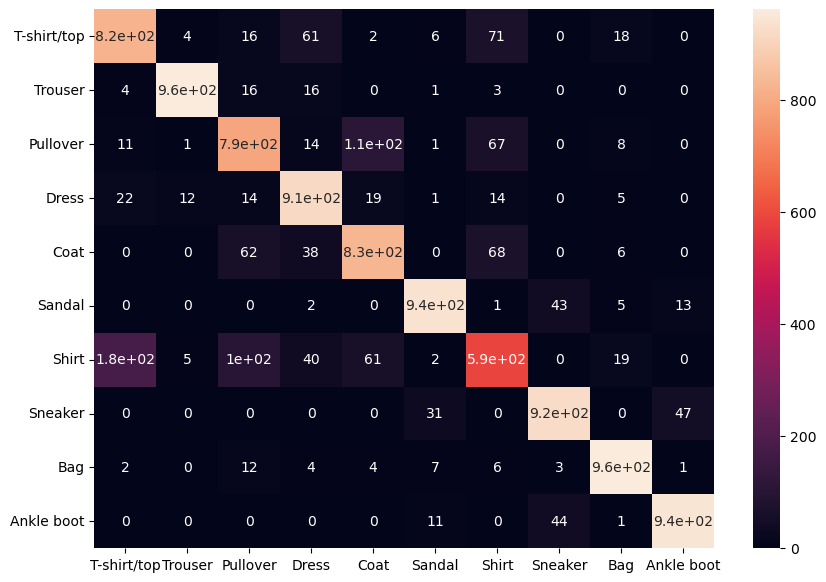

In [ ]:
# Create Confusion Matrix
final_model.train_mode = False

batch_data = test_data
batch_labels = test_labels
labels_one_hot_test = one_hot_encode(batch_labels, num_classes)
predictions_test = final_model.forward(batch_data)
predicted_test_labels = np.argmax(predictions_test, axis=1)

def create_conf_matrix(batch_labels, predicted_test_labels):
  conf_matrix = np.zeros((10, 10), dtype=int)
  for i in range(len(batch_labels)):
    conf_matrix[batch_labels[i], predicted_test_labels[i]] += 1
  return conf_matrix

conf_mat = create_conf_matrix(batch_labels, predicted_test_labels)

desc_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
df_cm = pd.DataFrame(conf_mat, index = [i for i in desc_labels],
                  columns = [i for i in desc_labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.savefig(f'Best_MLP_confmat.png')

**Final plots**

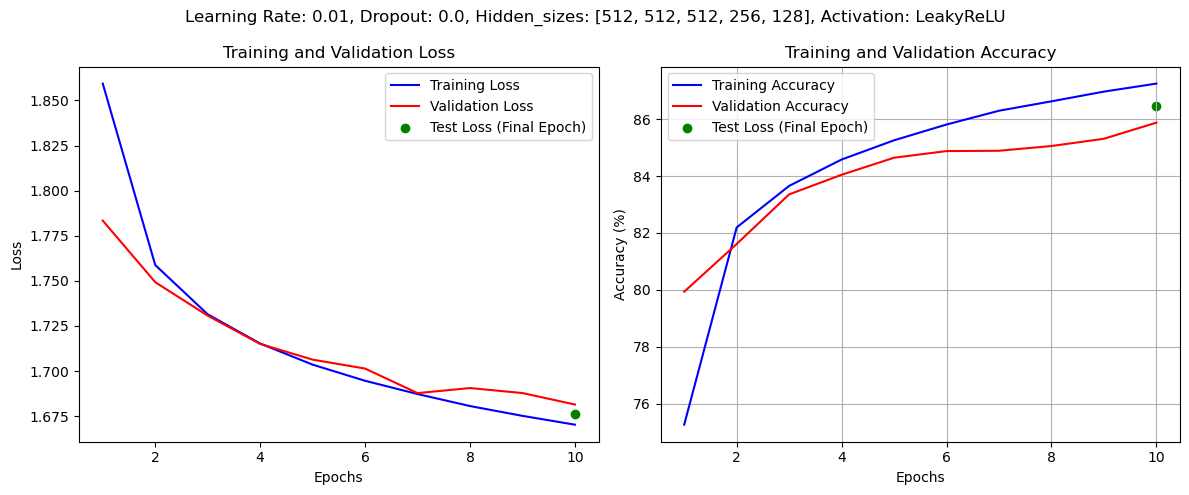


Final Test Accuracy with Best Parameters: 86.48%


In [ ]:
epochs_range = range(1, final_num_epochs + 1)

fig = plt.figure(figsize=(12, 5))
fig.suptitle(f'Learning Rate: {final_learning_rate}, Dropout: {final_dropout_prob}, Hidden_sizes: {final_hidden_sizes}, Activation: {final_activation_fn.__name__}')

# PLot for Training, Validation and Test Loss

plt.subplot(1, 2, 1)
plt.plot(epochs_range, final_history_train_loss, 'b-', label='Training Loss')
plt.plot(epochs_range, final_history_val_loss, 'r-', label='Validation Loss')
plt.scatter([num_epochs], [avg_test_loss], color='g', marker='o', label='Test Loss (Final Epoch)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot for Training, Validation and Test accuracy

plt.subplot(1, 2, 2)
plt.plot(epochs_range, final_history_train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs_range, final_history_val_accuracy, 'r-', label='Validation Accuracy')
plt.scatter([num_epochs], [test_accuracy], color='g', marker='o', label='Test Loss (Final Epoch)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig(f'Best_MLP_{final_learning_rate}_{final_dropout_prob}_{final_hidden_sizes}_{final_activation_fn.__name__}.png')

plt.show()
print(f"\nFinal Test Accuracy with Best Parameters: {test_accuracy:.2f}%")